In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings
import pickle

In [5]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0,0.0


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0


In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [11]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0
56202,9,PAYMEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [13]:
df.select_dtypes(include=['number']).corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.082987,-0.044298,-0.044521,-0.003309,0.014167,-0.052039
amount,0.082987,1.000000,0.003141,-0.006750,0.280046,0.400350,0.053073
oldbalanceOrg,-0.044298,0.003141,1.000000,0.998312,0.118636,0.084772,-0.002842
newbalanceOrig,-0.044521,-0.006750,0.998312,1.000000,0.121091,0.084138,-0.013623
oldbalanceDest,-0.003309,0.280046,0.118636,0.121091,1.000000,0.929135,-0.011274
newbalanceDest,0.014167,0.400350,0.084772,0.084138,0.929135,1.000000,-0.007438
isFraud,-0.052039,0.053073,-0.002842,-0.013623,-0.011274,-0.007438,1.000000


<Axes: >

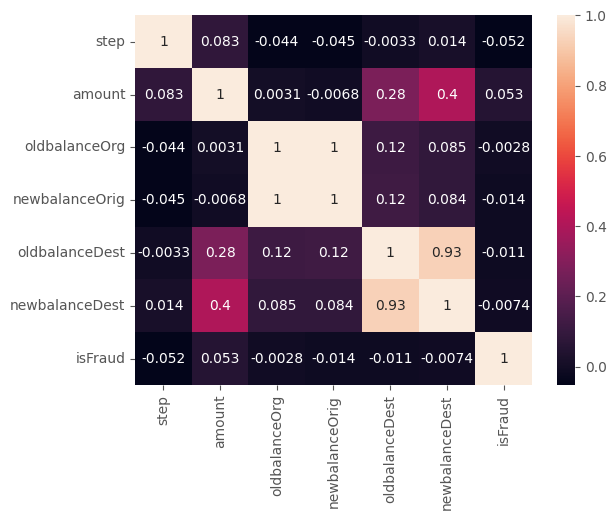

In [14]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)

<Axes: xlabel='step', ylabel='Count'>

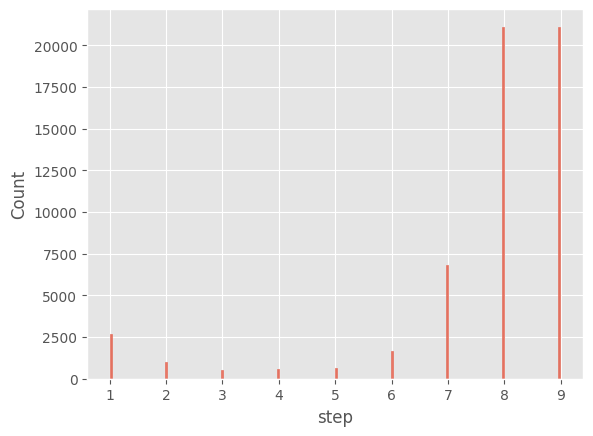

In [15]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

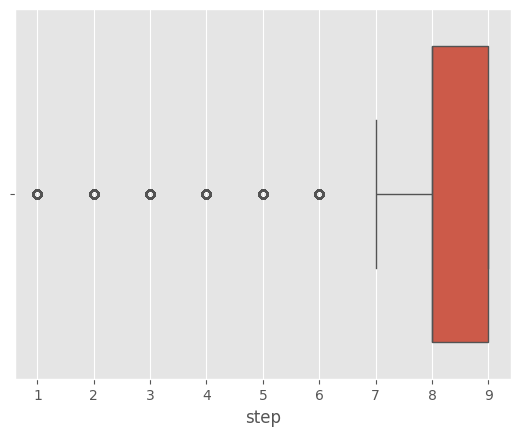

In [16]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

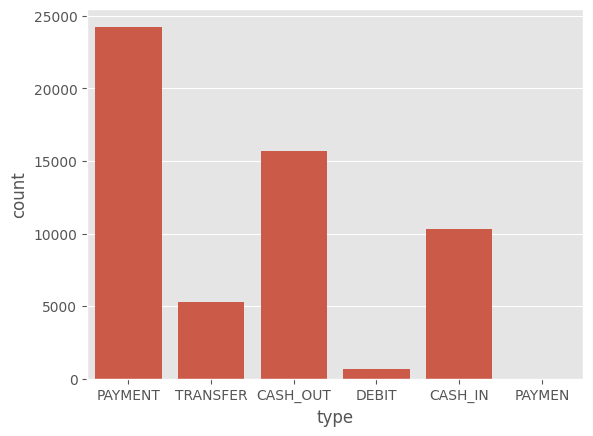

In [17]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

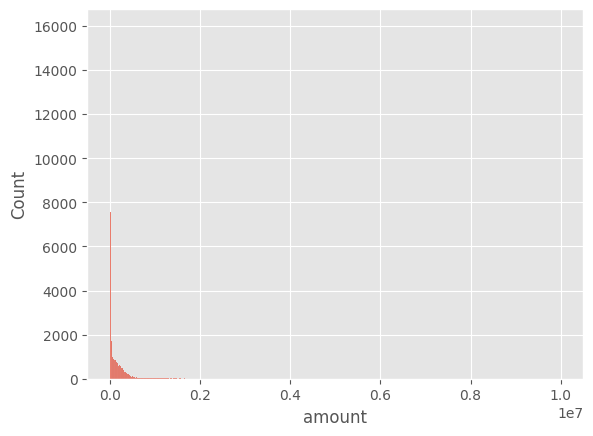

In [18]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

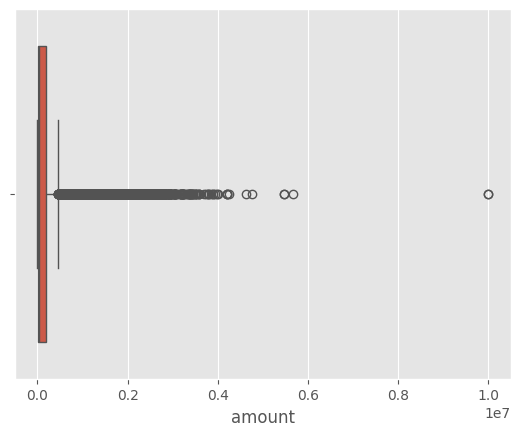

In [19]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

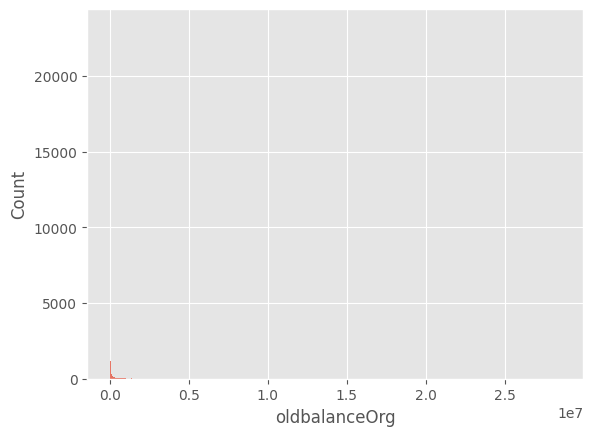

In [20]:
sns.histplot(data=df,x='oldbalanceOrg')

In [21]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,75
C1286084959,68
C1590550415,64
C2083562754,62
C248609774,61
...,...
M621634784,1
M2044525325,1
M528844197,1


<Axes: xlabel='oldbalanceDest'>

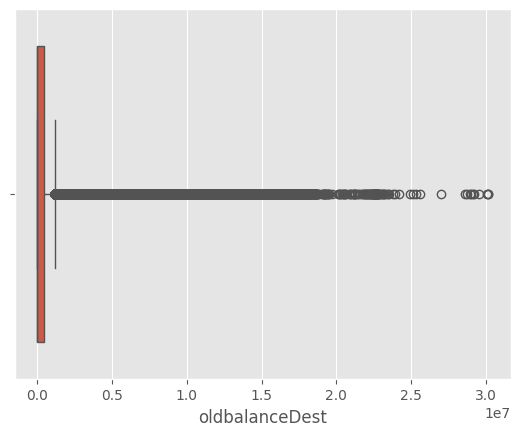

In [22]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

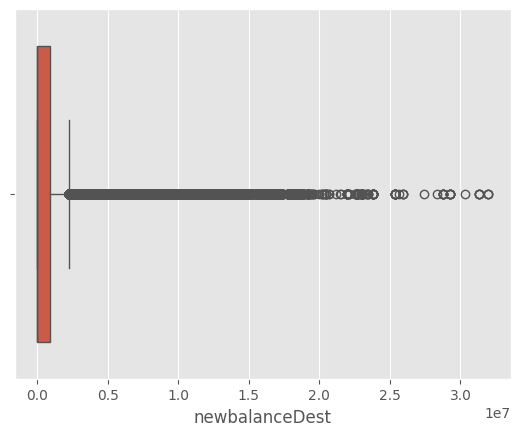

In [23]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

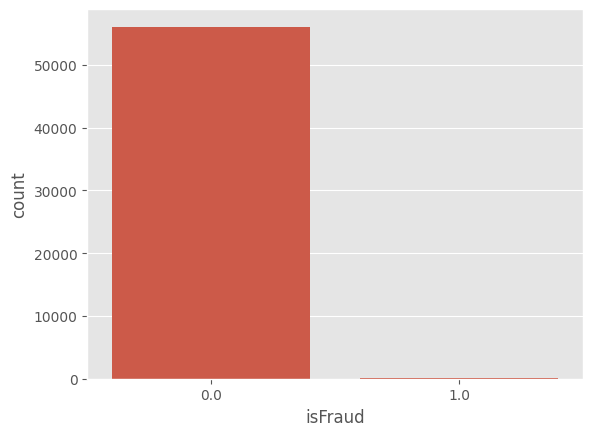

In [24]:
sns.countplot(data=df,x='isFraud')

In [25]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,56102
1.0,100


In [26]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,is not Fraud
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,is not Fraud
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,is not Fraud
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,is not Fraud


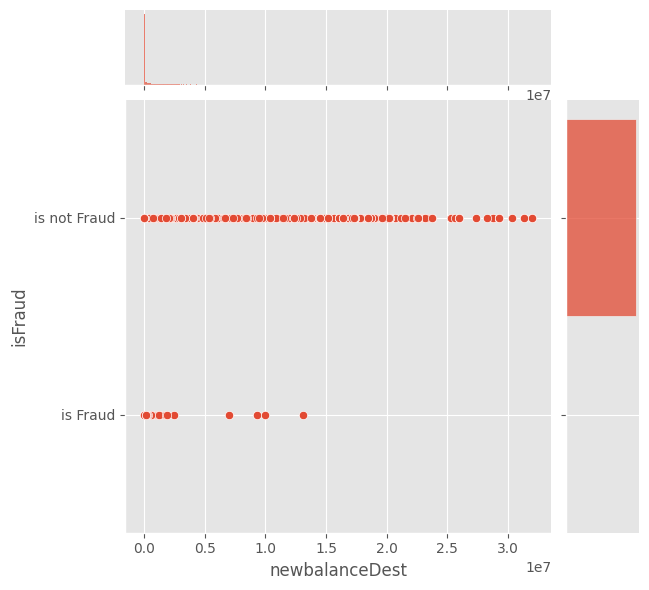

In [28]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

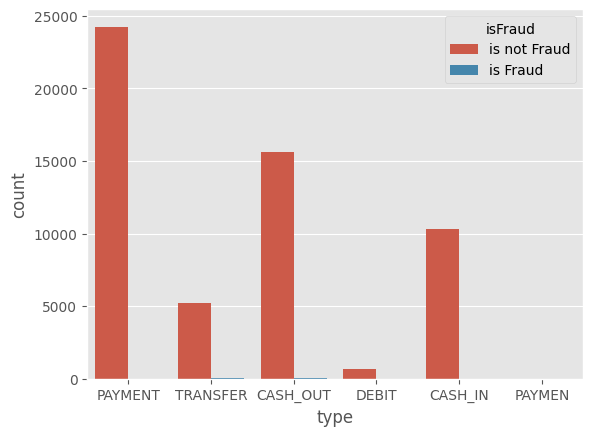

In [29]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

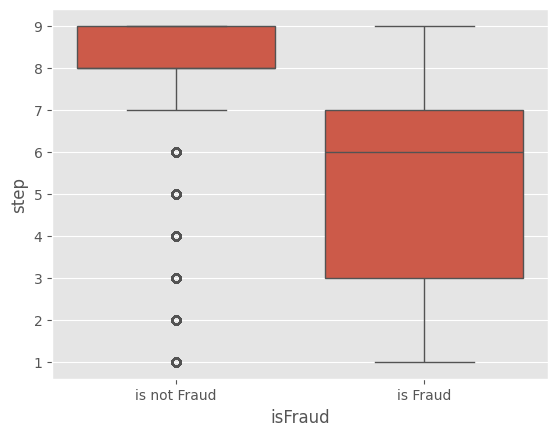

In [30]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

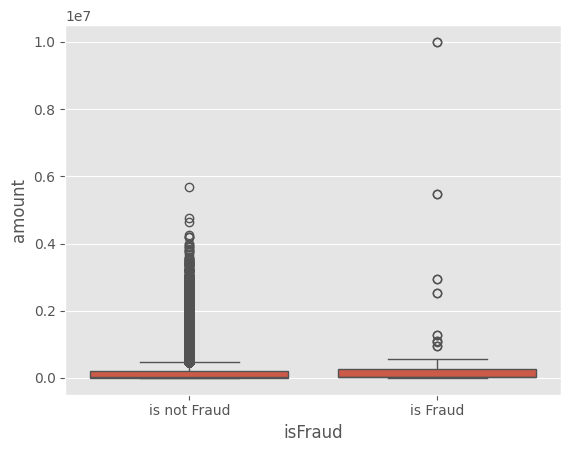

In [31]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

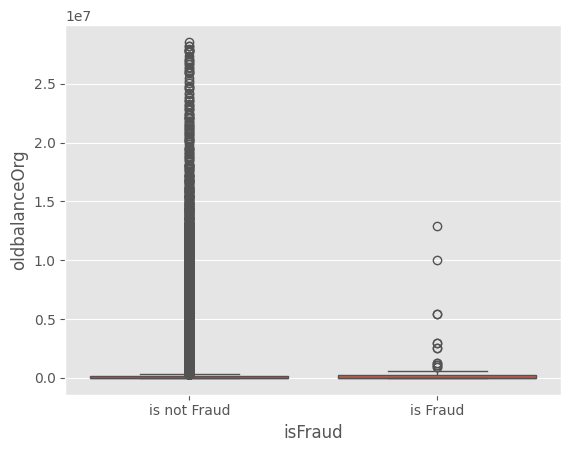

In [32]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

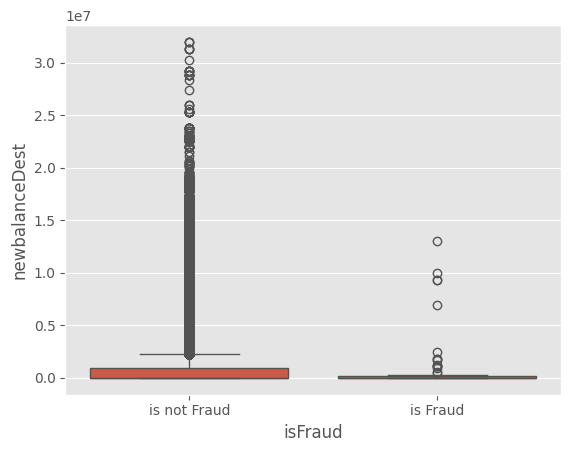

In [33]:
sns.boxplot(data=df,x='isFraud',y='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

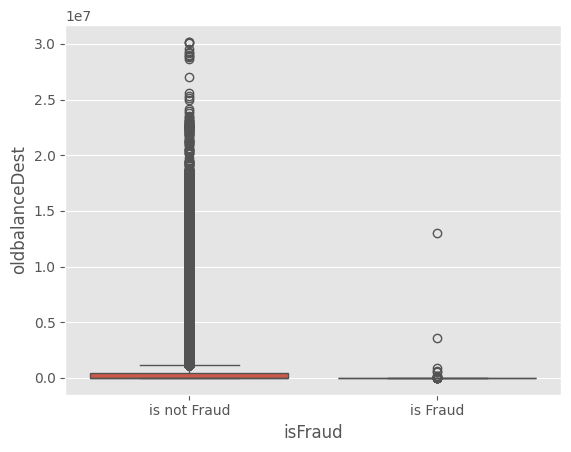

In [34]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

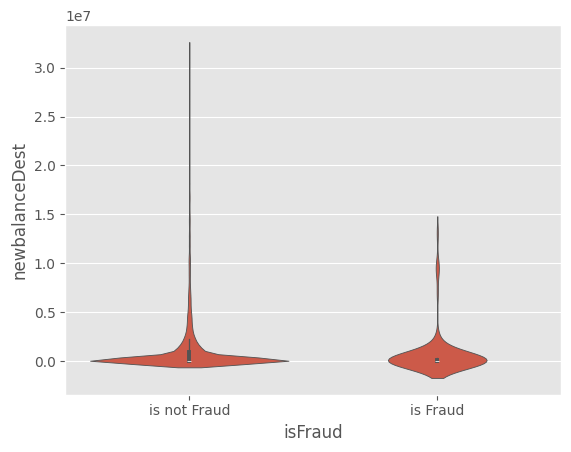

In [35]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [36]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,56203.000000,56203,5.620200e+04,56202,5.620200e+04,5.620200e+04,56202,5.620200e+04,5.620200e+04,56202
unique,NaN,6,NaN,56202,NaN,NaN,31878,NaN,NaN,2
top,NaN,PAYMENT,NaN,C1632500548,NaN,NaN,C985934102,NaN,NaN,is not Fraud
freq,NaN,24242,NaN,1,NaN,NaN,75,NaN,NaN,56102
mean,7.624451,NaN,1.598924e+05,NaN,7.322726e+05,7.464767e+05,NaN,8.391746e+05,1.169835e+06,NaN
std,1.999414,NaN,3.293750e+05,NaN,2.184696e+06,2.222611e+06,NaN,2.407619e+06,2.893515e+06,NaN
min,1.000000,NaN,6.300000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,8.000000,NaN,8.135660e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,8.000000,NaN,3.623700e+04,NaN,1.788471e+04,0.000000e+00,NaN,5.114860e+03,2.167320e+03,NaN
75%,9.000000,NaN,1.918409e+05,NaN,1.401448e+05,1.534157e+05,NaN,4.722510e+05,8.965790e+05,NaN


Data Preprocessing


In [37]:
df.isnull().sum()

,0
step,0
type,0
amount,1
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56202 entries, 0 to 56201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56202 non-null  int64  
 1   type            56202 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.7+ MB


<Axes: ylabel='amount'>

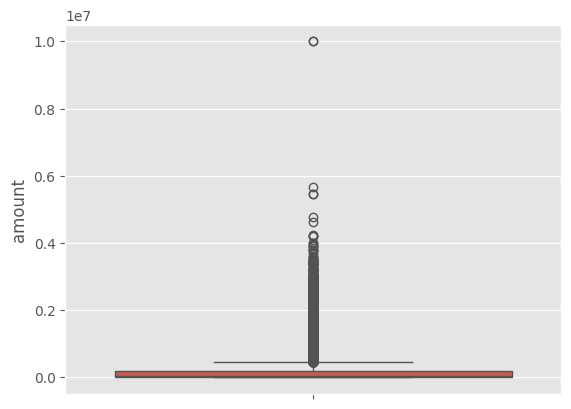

In [40]:
sns.boxplot(df['amount'])

In [41]:
print(stats.mode(df['amount']))

ModeResult(mode=np.float64(6285.19), count=np.int64(3))


In [42]:
print(np.mean(df['amount']))

159892.4183639372


In [43]:
from numpy._core.defchararray import lower
q1=np.quantile(df['amount'],0.25)
q3=np.quantile(df['amount'],0.75)
IQR=q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print(upper_bound)
print(lower_bound)


467398.74125
-267422.18875000003


In [44]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature,plot=plt)

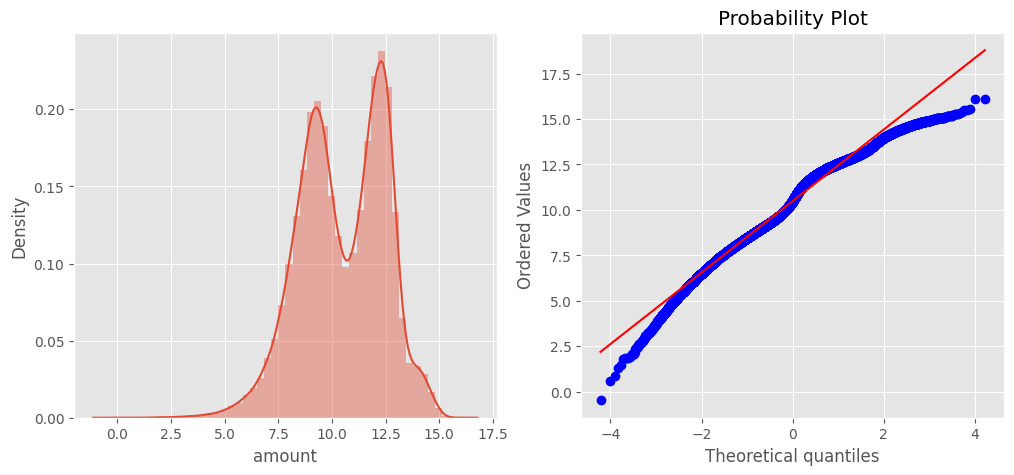

In [45]:
transformationplot(np.log(df[df['amount'] > 0]['amount']))

In [46]:
df['amount']= np.log(df['amount'])

In [47]:
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])
df['type'].value_counts()


,count
type,
3,24242
1,15672
0,10321
4,5267
2,700


In [48]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [49]:
y

,isFraud
0,is not Fraud
1,is not Fraud
2,is Fraud
3,is Fraud
4,is not Fraud
...,...
56197,is not Fraud
56198,is not Fraud
56199,is not Fraud
56200,is not Fraud


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44961, 9)
(11241, 9)
(44961,)
(11241,)


Random Forest Classifier

In [52]:
rfc=RandomForestClassifier()
# Drop non-numeric columns 'nameOrig' and 'nameDest' from x_train and x_test
# before fitting the model, as RandomForestClassifier expects numerical input.
x_train_numeric = x_train.drop(['nameOrig', 'nameDest'], axis=1)
x_test_numeric = x_test.drop(['nameOrig', 'nameDest'], axis=1)
rfc.fit(x_train_numeric,y_train)

RandomForestClassifier()

In [53]:
y_test_predict1=rfc.predict(x_test_numeric)

In [55]:
test_accuracy = accuracy_score(y_test,y_test_predict1)
print(test_accuracy)

0.9991993594875901


In [56]:
y_train_predict1 = rfc.predict(x_train_numeric)
train_accuracy = accuracy_score(y_train,y_train_predict1)
print(train_accuracy)

1.0


In [57]:
y_test_pred=rfc.predict(x_test_numeric)
pd.crosstab(y_test,y_test_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,3,9
is not Fraud,0,11229


In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    is Fraud       1.00      0.25      0.40        12
is not Fraud       1.00      1.00      1.00     11229

    accuracy                           1.00     11241
   macro avg       1.00      0.62      0.70     11241
weighted avg       1.00      1.00      1.00     11241



Decision Tree Classifier


In [59]:
from sklearn.tree import DecisionTreeClassifier
dfc = DecisionTreeClassifier()
dfc.fit(x_train_numeric,y_train)

DecisionTreeClassifier()

In [60]:
y_test_predict2=dfc.predict(x_test_numeric)
test_accuracy = accuracy_score(y_test,y_test_predict2)
print(test_accuracy)

0.9987545592029179


In [61]:
y_train_predict2=dfc.predict(x_train_numeric)
train_accuracy = accuracy_score(y_train,y_train_predict2)
print(train_accuracy)

1.0


In [62]:
pd.crosstab(y_test,y_test_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,3,9
is not Fraud,0,11229


In [63]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    is Fraud       1.00      0.25      0.40        12
is not Fraud       1.00      1.00      1.00     11229

    accuracy                           1.00     11241
   macro avg       1.00      0.62      0.70     11241
weighted avg       1.00      1.00      1.00     11241



ExtraTrees Classifier


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train_numeric,y_train)

ExtraTreesClassifier()

In [66]:
y_test_predict3=etc.predict(x_test_numeric)
test_accuracy = accuracy_score(y_test,y_test_predict3)
print(test_accuracy)

0.9990214393737212


In [65]:
y_train_predict3=etc.predict(x_train_numeric)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [67]:
pd.crosstab(y_test,y_test_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,3,9
is not Fraud,0,11229


In [68]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    is Fraud       1.00      0.25      0.40        12
is not Fraud       1.00      1.00      1.00     11229

    accuracy                           1.00     11241
   macro avg       1.00      0.62      0.70     11241
weighted avg       1.00      1.00      1.00     11241



SupportVectorMachine Classifier

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train_numeric,y_train)
y_test_predict4=svc.predict(x_test_numeric)
test_accuracy = accuracy_score(y_test,y_test_predict4)
print(test_accuracy)

0.9989324793167867


In [70]:
y_train_predict4=svc.predict(x_train_numeric)
train_accuracy = accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9981317141522653

In [71]:
pd.crosstab(y_test,y_test_pred)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,3,9
is not Fraud,0,11229


In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    is Fraud       1.00      0.25      0.40        12
is not Fraud       1.00      1.00      1.00     11229

    accuracy                           1.00     11241
   macro avg       1.00      0.62      0.70     11241
weighted avg       1.00      1.00      1.00     11241



In [73]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)

In [75]:
y_test1 = le.transform(y_test)

In [76]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

Xgboost Classifier

In [78]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train_numeric,y_train1)
y_test_predict5 = xgb1.predict(x_test_numeric)
test_accuracy = accuracy_score(y_test1,y_test_predict5)
print(test_accuracy)

0.999377279601459


In [79]:
y_train_predict5 = xgb1.predict(x_train_numeric)
train_accuracy = accuracy_score(y_train1,y_train_predict5)
train_accuracy

1.0

In [80]:
pd.crosstab(y_test1,y_test_pred)

col_0,is Fraud,is not Fraud
row_0,,
0,3,9
1,0,11229


In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       1.00      1.00      1.00     11229

    accuracy                           1.00     11241
   macro avg       0.89      0.79      0.83     11241
weighted avg       1.00      1.00      1.00     11241



Evaluating Performance of Model and Saving the Model

In [83]:
xgb1.save_model("xgb_fraud_detection_model.json")
